In [36]:
# Copyright 2019 Steven Mattis and Troy Butler

import numpy as np
import dynamical_systems as ds
from luq import *

# Uniformly sample the parameter samples to form a "prediction" or "test" set
num_samples = int(1e3)

params = np.random.uniform(size=(num_samples, 1))
param_range = np.array([[-0.5, 0.5]])

ics = np.random.uniform(size=(num_samples, 2))
ic_range = np.array([[0.4, 0.5],  #a
                     [0.4, 0.5]])  #b
params = param_range[:, 0] + (param_range[:, 1] - param_range[:, 0]) * params
ics = ic_range[:, 0] + (ic_range[:, 1] - ic_range[:, 0]) * ics
param_labels = [r'$\nu$']
ic_labels = [r'$a$', r'$b$']


# Construct the predicted time series data

num_time_preds = int(500)  # number of predictions (uniformly space) between [time_start,time_end]
time_start = 0.5
time_end = 40.0
times = np.linspace(time_start, time_end, num_time_preds)

phys = ds.Lienard()
predicted_time_series = phys.solve(ics=ics, params=params, t_eval=times)

In [37]:
num_obs = int(1e3)

true_a = 2
true_b = 2

params_obs = np.random.beta(size=(num_obs, 1), a=true_a, b=true_b)
ics_obs = np.random.beta(size=(num_obs, 2), a=true_a, b=true_b) 

params_obs = param_range[:, 0] + (param_range[:, 1] - param_range[:, 0]) * params_obs
ics_obs = ic_range[:, 0] + (ic_range[:, 1] - ic_range[:, 0]) * ics_obs

#ics_obs = 2.0 * ics_obs - 1.0
#params_obs = params_obs - 0.5

observed_time_series = phys.solve(ics=ics_obs, params=params_obs, t_eval=times)

# Add noise if desired
with_noise = False
noise_stdev = 0.05

if with_noise:
    observed_time_series += noise_stdev * np.random.randn(num_obs)

In [38]:
# Use LUQ to learn dynamics and QoIs
learn = LUQ(predicted_time_series, observed_time_series, times)

# time array indices over which to use
time_start_idx = 350
time_end_idx = 499

# Clean data
learn.clean_data(time_start_idx=time_start_idx, time_end_idx=time_end_idx,
                 num_clean_obs=50, tol=3.0e-2, min_knots=15, max_knots=40)
learn.dynamics(cluster_method='spectral', kwargs={'n_clusters': 2, 'n_init': 10})

0 16 0.015969377117699243
0 16 knots being used with error of 0.015969377117699243
1 16 0.01599955815996051
1 16 knots being used with error of 0.01599955815996051
2 16 0.016204312651022745
2 16 knots being used with error of 0.016204312651022745
3 16 0.016247048778591
3 16 knots being used with error of 0.016247048778591
4 16 0.016132326484325155
4 16 knots being used with error of 0.016132326484325155
5 16 0.020240972868618718
5 16 knots being used with error of 0.020240972868618718
6 16 0.017430429323583352
6 16 knots being used with error of 0.017430429323583352
7 16 0.016975648610972165
7 16 knots being used with error of 0.016975648610972165
8 16 0.018861885283000722
8 16 knots being used with error of 0.018861885283000722
9 16 0.0164212093665861
9 16 knots being used with error of 0.0164212093665861
10 16 0.015969572863690128
10 16 knots being used with error of 0.015969572863690128
11 16 0.01622877216806551
11 16 knots being used with error of 0.01622877216806551
12 16 0.016899

100 16 0.016236654860772432
100 16 knots being used with error of 0.016236654860772432
101 16 0.016348424271206242
101 16 knots being used with error of 0.016348424271206242
102 16 0.015869281857765413
102 16 knots being used with error of 0.015869281857765413
103 16 0.01586713494961548
103 16 knots being used with error of 0.01586713494961548
104 16 0.016691040865616687
104 16 knots being used with error of 0.016691040865616687
105 16 0.016527754486152832
105 16 knots being used with error of 0.016527754486152832
106 16 0.015871424803441343
106 16 knots being used with error of 0.015871424803441343
107 16 0.015349030793362884
107 16 knots being used with error of 0.015349030793362884
108 16 0.019328962896390297
108 16 knots being used with error of 0.019328962896390297
109 16 0.018882630899566294
109 16 knots being used with error of 0.018882630899566294
110 16 0.016021264866908098
110 16 knots being used with error of 0.016021264866908098
111 16 0.01998503765552718
111 16 knots being

197 16 0.015260176966127215
197 16 knots being used with error of 0.015260176966127215
198 16 0.015244542068532369
198 16 knots being used with error of 0.015244542068532369
199 16 0.016400351466404207
199 16 knots being used with error of 0.016400351466404207
200 16 0.018993218262561205
200 16 knots being used with error of 0.018993218262561205
201 16 0.01647281037275368
201 16 knots being used with error of 0.01647281037275368
202 16 0.016154337962265165
202 16 knots being used with error of 0.016154337962265165
203 16 0.017039431842518573
203 16 knots being used with error of 0.017039431842518573
204 16 0.017080679417711957
204 16 knots being used with error of 0.017080679417711957
205 16 0.015934747234474134
205 16 knots being used with error of 0.015934747234474134
206 16 0.016075549266923582
206 16 knots being used with error of 0.016075549266923582
207 16 0.01581347679524765
207 16 knots being used with error of 0.01581347679524765
208 16 0.01545998236672478
208 16 knots being u

293 16 0.016183507764449063
293 16 knots being used with error of 0.016183507764449063
294 16 0.01645933942428851
294 16 knots being used with error of 0.01645933942428851
295 16 0.016292389126072147
295 16 knots being used with error of 0.016292389126072147
296 16 0.01570421048567394
296 16 knots being used with error of 0.01570421048567394
297 16 0.016649187683693303
297 16 knots being used with error of 0.016649187683693303
298 16 0.016203718180669024
298 16 knots being used with error of 0.016203718180669024
299 16 0.01605383380300204
299 16 knots being used with error of 0.01605383380300204
300 16 0.016305385193811275
300 16 knots being used with error of 0.016305385193811275
301 16 0.019566362424939452
301 16 knots being used with error of 0.019566362424939452
302 16 0.015812956523883842
302 16 knots being used with error of 0.015812956523883842
303 16 0.01651011232396621
303 16 knots being used with error of 0.01651011232396621
304 16 0.01674516267123382
304 16 knots being used 

390 16 0.01911061606284263
390 16 knots being used with error of 0.01911061606284263
391 16 0.015286640994816709
391 16 knots being used with error of 0.015286640994816709
392 16 0.01643639671421047
392 16 knots being used with error of 0.01643639671421047
393 16 0.016235630217833242
393 16 knots being used with error of 0.016235630217833242
394 16 0.01684443240628279
394 16 knots being used with error of 0.01684443240628279
395 16 0.02000462278231025
395 16 knots being used with error of 0.02000462278231025
396 16 0.01743403601659127
396 16 knots being used with error of 0.01743403601659127
397 16 0.018789675864265904
397 16 knots being used with error of 0.018789675864265904
398 16 0.016915927383002835
398 16 knots being used with error of 0.016915927383002835
399 16 0.01722451558858399
399 16 knots being used with error of 0.01722451558858399
400 16 0.015434878441566748
400 16 knots being used with error of 0.015434878441566748
401 16 0.01633516899261302
401 16 knots being used with

488 16 0.017336347434801294
488 16 knots being used with error of 0.017336347434801294
489 16 0.01667048638676757
489 16 knots being used with error of 0.01667048638676757
490 16 0.016146083651148394
490 16 knots being used with error of 0.016146083651148394
491 16 0.016362135264802916
491 16 knots being used with error of 0.016362135264802916
492 16 0.016825567927700104
492 16 knots being used with error of 0.016825567927700104
493 16 0.02180188291152125
493 16 knots being used with error of 0.02180188291152125
494 16 0.017630334382982876
494 16 knots being used with error of 0.017630334382982876
495 16 0.016265396784517806
495 16 knots being used with error of 0.016265396784517806
496 16 0.015985360968569295
496 16 knots being used with error of 0.015985360968569295
497 16 0.018747204791690453
497 16 knots being used with error of 0.018747204791690453
498 16 0.015946458610631275
498 16 knots being used with error of 0.015946458610631275
499 16 0.016018857277019096
499 16 knots being 

584 16 0.016448758269511483
584 16 knots being used with error of 0.016448758269511483
585 16 0.016103471373251077
585 16 knots being used with error of 0.016103471373251077
586 16 0.020090986066033666
586 16 knots being used with error of 0.020090986066033666
587 16 0.016245015249352252
587 16 knots being used with error of 0.016245015249352252
588 16 0.01606215829440466
588 16 knots being used with error of 0.01606215829440466
589 16 0.016492853561049677
589 16 knots being used with error of 0.016492853561049677
590 16 0.015262894488366556
590 16 knots being used with error of 0.015262894488366556
591 16 0.01631882069050991
591 16 knots being used with error of 0.01631882069050991
592 16 0.01617126803724575
592 16 knots being used with error of 0.01617126803724575
593 16 0.01604218318937574
593 16 knots being used with error of 0.01604218318937574
594 16 0.01589335649345317
594 16 knots being used with error of 0.01589335649345317
595 16 0.016274633472113016
595 16 knots being used w

682 16 0.01622399510124624
682 16 knots being used with error of 0.01622399510124624
683 16 0.016504697224561892
683 16 knots being used with error of 0.016504697224561892
684 16 0.015428706670632479
684 16 knots being used with error of 0.015428706670632479
685 16 0.016290660723857788
685 16 knots being used with error of 0.016290660723857788
686 16 0.016717974723483207
686 16 knots being used with error of 0.016717974723483207
687 16 0.015549402139852241
687 16 knots being used with error of 0.015549402139852241
688 16 0.019812312471372856
688 16 knots being used with error of 0.019812312471372856
689 16 0.016022467334696477
689 16 knots being used with error of 0.016022467334696477
690 16 0.016143184474763546
690 16 knots being used with error of 0.016143184474763546
691 16 0.016079631896967622
691 16 knots being used with error of 0.016079631896967622
692 16 0.01639151819794567
692 16 knots being used with error of 0.01639151819794567
693 16 0.016075263949221465
693 16 knots being 

778 16 0.016252161354385626
778 16 knots being used with error of 0.016252161354385626
779 16 0.016148112231996015
779 16 knots being used with error of 0.016148112231996015
780 16 0.0163348973691239
780 16 knots being used with error of 0.0163348973691239
781 16 0.016163199491999007
781 16 knots being used with error of 0.016163199491999007
782 16 0.01612957177280933
782 16 knots being used with error of 0.01612957177280933
783 16 0.01672498010223348
783 16 knots being used with error of 0.01672498010223348
784 16 0.019079201373115518
784 16 knots being used with error of 0.019079201373115518
785 16 0.015685676339938108
785 16 knots being used with error of 0.015685676339938108
786 16 0.01619564881613809
786 16 knots being used with error of 0.01619564881613809
787 16 0.016511534823995516
787 16 knots being used with error of 0.016511534823995516
788 16 0.016299759891034705
788 16 knots being used with error of 0.016299759891034705
789 16 0.01624546533796071
789 16 knots being used wi

876 16 0.01610209629351455
876 16 knots being used with error of 0.01610209629351455
877 16 0.01671236556937183
877 16 knots being used with error of 0.01671236556937183
878 16 0.017298602952321822
878 16 knots being used with error of 0.017298602952321822
879 16 0.01795132473410533
879 16 knots being used with error of 0.01795132473410533
880 16 0.015466299118021241
880 16 knots being used with error of 0.015466299118021241
881 16 0.01628476378900924
881 16 knots being used with error of 0.01628476378900924
882 16 0.016359648411194923
882 16 knots being used with error of 0.016359648411194923
883 16 0.015933309599169974
883 16 knots being used with error of 0.015933309599169974
884 16 0.01594973556737066
884 16 knots being used with error of 0.01594973556737066
885 16 0.015866061914272395
885 16 knots being used with error of 0.015866061914272395
886 16 0.01677542759215783
886 16 knots being used with error of 0.01677542759215783
887 16 0.0157486407708723
887 16 knots being used with 

973 16 0.0157817513228095
973 16 knots being used with error of 0.0157817513228095
974 16 0.016025801292281594
974 16 knots being used with error of 0.016025801292281594
975 16 0.01568055085194173
975 16 knots being used with error of 0.01568055085194173
976 16 0.016246077641057288
976 16 knots being used with error of 0.016246077641057288
977 16 0.015467846636792557
977 16 knots being used with error of 0.015467846636792557
978 16 0.016910462309952107
978 16 knots being used with error of 0.016910462309952107
979 16 0.016444409573750533
979 16 knots being used with error of 0.016444409573750533
980 16 0.016045154047944325
980 16 knots being used with error of 0.016045154047944325
981 16 0.01656697400535737
981 16 knots being used with error of 0.01656697400535737
982 16 0.01627934125037681
982 16 knots being used with error of 0.01627934125037681
983 16 0.015867334355491983
983 16 knots being used with error of 0.015867334355491983
984 16 0.01857207792953107
984 16 knots being used wi

70 16 0.01844802118692743
70 16 knots being used with error of 0.01844802118692743
71 16 0.016132544300728982
71 16 knots being used with error of 0.016132544300728982
72 16 0.015979200165384434
72 16 knots being used with error of 0.015979200165384434
73 16 0.01516110394268031
73 16 knots being used with error of 0.01516110394268031
74 16 0.01623372912753536
74 16 knots being used with error of 0.01623372912753536
75 16 0.016135575216190256
75 16 knots being used with error of 0.016135575216190256
76 16 0.016117073105338716
76 16 knots being used with error of 0.016117073105338716
77 16 0.01629404844174334
77 16 knots being used with error of 0.01629404844174334
78 16 0.015439390867416108
78 16 knots being used with error of 0.015439390867416108
79 16 0.017115805760556213
79 16 knots being used with error of 0.017115805760556213
80 16 0.017458635787482378
80 16 knots being used with error of 0.017458635787482378
81 16 0.016031961729580522
81 16 knots being used with error of 0.0160319

168 16 0.016476863590132305
168 16 knots being used with error of 0.016476863590132305
169 16 0.015284039064519665
169 16 knots being used with error of 0.015284039064519665
170 16 0.016366951464270616
170 16 knots being used with error of 0.016366951464270616
171 16 0.01589047772598204
171 16 knots being used with error of 0.01589047772598204
172 16 0.016179178081513316
172 16 knots being used with error of 0.016179178081513316
173 16 0.01643334682972659
173 16 knots being used with error of 0.01643334682972659
174 16 0.016224715934203774
174 16 knots being used with error of 0.016224715934203774
175 16 0.016012217487979576
175 16 knots being used with error of 0.016012217487979576
176 16 0.018022510362964306
176 16 knots being used with error of 0.018022510362964306
177 16 0.01567509321421682
177 16 knots being used with error of 0.01567509321421682
178 16 0.01617405069794538
178 16 knots being used with error of 0.01617405069794538
179 16 0.016075193440661436
179 16 knots being used

264 16 0.01646361717013082
264 16 knots being used with error of 0.01646361717013082
265 16 0.015828931694586594
265 16 knots being used with error of 0.015828931694586594
266 16 0.015634597178066163
266 16 knots being used with error of 0.015634597178066163
267 16 0.015392691557199323
267 16 knots being used with error of 0.015392691557199323
268 16 0.016308023865239066
268 16 knots being used with error of 0.016308023865239066
269 16 0.01608857364133734
269 16 knots being used with error of 0.01608857364133734
270 16 0.01640384184069717
270 16 knots being used with error of 0.01640384184069717
271 16 0.01631805154179607
271 16 knots being used with error of 0.01631805154179607
272 16 0.018407313782526614
272 16 knots being used with error of 0.018407313782526614
273 16 0.01633464748003239
273 16 knots being used with error of 0.01633464748003239
274 16 0.01598003160594488
274 16 knots being used with error of 0.01598003160594488
275 16 0.016173802376605907
275 16 knots being used wit

361 16 0.015863174840761274
361 16 knots being used with error of 0.015863174840761274
362 16 0.01598435380294062
362 16 knots being used with error of 0.01598435380294062
363 16 0.016401707622669563
363 16 knots being used with error of 0.016401707622669563
364 16 0.01668117442246633
364 16 knots being used with error of 0.01668117442246633
365 16 0.01527578740142887
365 16 knots being used with error of 0.01527578740142887
366 16 0.018150025241251772
366 16 knots being used with error of 0.018150025241251772
367 16 0.016595195738650204
367 16 knots being used with error of 0.016595195738650204
368 16 0.017699684855182918
368 16 knots being used with error of 0.017699684855182918
369 16 0.01595871914170957
369 16 knots being used with error of 0.01595871914170957
370 16 0.01565961345671566
370 16 knots being used with error of 0.01565961345671566
371 16 0.016281363284006978
371 16 knots being used with error of 0.016281363284006978
372 16 0.01543800836904205
372 16 knots being used wi

457 16 0.015971715201255603
457 16 knots being used with error of 0.015971715201255603
458 16 0.017512368964397496
458 16 knots being used with error of 0.017512368964397496
459 16 0.016298786572059163
459 16 knots being used with error of 0.016298786572059163
460 16 0.016078085741799874
460 16 knots being used with error of 0.016078085741799874
461 16 0.016040625476725315
461 16 knots being used with error of 0.016040625476725315
462 16 0.016281526932820166
462 16 knots being used with error of 0.016281526932820166
463 16 0.015648981739294566
463 16 knots being used with error of 0.015648981739294566
464 16 0.015731580110088527
464 16 knots being used with error of 0.015731580110088527
465 16 0.01610592296500121
465 16 knots being used with error of 0.01610592296500121
466 16 0.01631603450660266
466 16 knots being used with error of 0.01631603450660266
467 16 0.016340992183040554
467 16 knots being used with error of 0.016340992183040554
468 16 0.01694754952743638
468 16 knots being u

553 16 0.015754161774187665
553 16 knots being used with error of 0.015754161774187665
554 16 0.016227155311079933
554 16 knots being used with error of 0.016227155311079933
555 16 0.016448345967226677
555 16 knots being used with error of 0.016448345967226677
556 16 0.01600504179213439
556 16 knots being used with error of 0.01600504179213439
557 16 0.015130721727545014
557 16 knots being used with error of 0.015130721727545014
558 16 0.016066406454245712
558 16 knots being used with error of 0.016066406454245712
559 16 0.015505427522942775
559 16 knots being used with error of 0.015505427522942775
560 16 0.016780340422704508
560 16 knots being used with error of 0.016780340422704508
561 16 0.01637722289792034
561 16 knots being used with error of 0.01637722289792034
562 16 0.015077305784965163
562 16 knots being used with error of 0.015077305784965163
563 16 0.016032191288963275
563 16 knots being used with error of 0.016032191288963275
564 16 0.016304940900708137
564 16 knots being 

648 16 0.015950801190039922
648 16 knots being used with error of 0.015950801190039922
649 16 0.01630810772172426
649 16 knots being used with error of 0.01630810772172426
650 16 0.016245235475850908
650 16 knots being used with error of 0.016245235475850908
651 16 0.01623049974661695
651 16 knots being used with error of 0.01623049974661695
652 16 0.016140978327034327
652 16 knots being used with error of 0.016140978327034327
653 16 0.01676104249270343
653 16 knots being used with error of 0.01676104249270343
654 16 0.015763024182948993
654 16 knots being used with error of 0.015763024182948993
655 16 0.015979673472488357
655 16 knots being used with error of 0.015979673472488357
656 16 0.016773809809134312
656 16 knots being used with error of 0.016773809809134312
657 16 0.016323738126749716
657 16 knots being used with error of 0.016323738126749716
658 16 0.0155309044351209
658 16 knots being used with error of 0.0155309044351209
659 16 0.01600126810181585
659 16 knots being used wi

745 16 0.015973355274813826
745 16 knots being used with error of 0.015973355274813826
746 16 0.01593997639649937
746 16 knots being used with error of 0.01593997639649937
747 16 0.016033819713044756
747 16 knots being used with error of 0.016033819713044756
748 16 0.015563719860153815
748 16 knots being used with error of 0.015563719860153815
749 16 0.015305855355974483
749 16 knots being used with error of 0.015305855355974483
750 16 0.015502182264541293
750 16 knots being used with error of 0.015502182264541293
751 16 0.01635250743802409
751 16 knots being used with error of 0.01635250743802409
752 16 0.016179362722588003
752 16 knots being used with error of 0.016179362722588003
753 16 0.0159104551960942
753 16 knots being used with error of 0.0159104551960942
754 16 0.01869616715537863
754 16 knots being used with error of 0.01869616715537863
755 16 0.016779260756551638
755 16 knots being used with error of 0.016779260756551638
756 16 0.01616738480239107
756 16 knots being used wi

842 16 0.015365217534805159
842 16 knots being used with error of 0.015365217534805159
843 16 0.015927558145210543
843 16 knots being used with error of 0.015927558145210543
844 16 0.015318223146959076
844 16 knots being used with error of 0.015318223146959076
845 16 0.016246612060410108
845 16 knots being used with error of 0.016246612060410108
846 16 0.016304170743384232
846 16 knots being used with error of 0.016304170743384232
847 16 0.016132467206565124
847 16 knots being used with error of 0.016132467206565124
848 16 0.016809661320045043
848 16 knots being used with error of 0.016809661320045043
849 16 0.016625264733239876
849 16 knots being used with error of 0.016625264733239876
850 16 0.015309594019795198
850 16 knots being used with error of 0.015309594019795198
851 16 0.01688401245464576
851 16 knots being used with error of 0.01688401245464576
852 16 0.01599219045347367
852 16 knots being used with error of 0.01599219045347367
853 16 0.016482395080559216
853 16 knots being 

938 16 0.015451938790837295
938 16 knots being used with error of 0.015451938790837295
939 16 0.016002342014649625
939 16 knots being used with error of 0.016002342014649625
940 16 0.01679507999670005
940 16 knots being used with error of 0.01679507999670005
941 16 0.0168049278176769
941 16 knots being used with error of 0.0168049278176769
942 16 0.015163965417292528
942 16 knots being used with error of 0.015163965417292528
943 16 0.016089841367106904
943 16 knots being used with error of 0.016089841367106904
944 16 0.01670359219410783
944 16 knots being used with error of 0.01670359219410783
945 16 0.017168255021839985
945 16 knots being used with error of 0.017168255021839985
946 16 0.016178550292331364
946 16 knots being used with error of 0.016178550292331364
947 16 0.015807730981230405
947 16 knots being used with error of 0.015807730981230405
948 16 0.015518161404413084
948 16 knots being used with error of 0.015518161404413084
949 16 0.015516451162705249
949 16 knots being used

1.0 positive nu ratio for cluster 0
0.1675213675213675 positive nu ratio for cluster 1


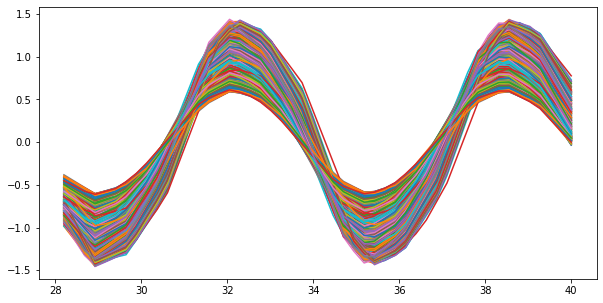

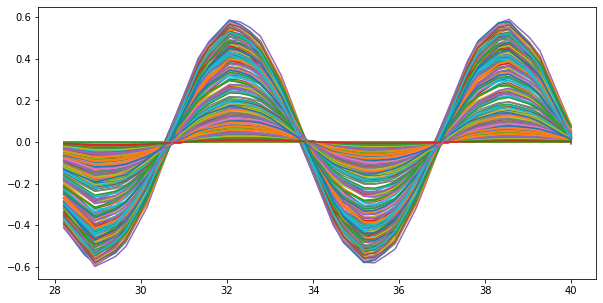

In [39]:
import matplotlib.pyplot as plt

for j in range(learn.num_clusters):
    plt.figure(figsize=(10,5))
    pos = 0
    neg = 0
    for i in range(num_samples):
        if learn.predict_labels[i] == j:
            if params[i] < 0.0:
                neg += 1
            else:
                pos += 1
            plt.plot(learn.clean_times, learn.clean_predictions[i, :])
    print(pos/(pos+neg), 'positive nu ratio for cluster', j)


In [46]:
predict_map, obs_map = learn.learn_qois_and_transform(num_qoi=1)

2 principal components explain 99.6210% of variance for cluster 0 with {'kernel': 'linear'}
9 principal components explain 96.1000% of variance for cluster 0 with {'kernel': 'rbf'}
2 principal components explain 95.2436% of variance for cluster 0 with {'kernel': 'sigmoid'}
5 principal components explain 96.8575% of variance for cluster 0 with {'kernel': 'poly'}
2 principal components explain 98.2208% of variance for cluster 0 with {'kernel': 'cosine'}
Best kPCA for cluster  0  is  {'kernel': 'linear'}
1 principal components explain 78.7279% of variance.
2 principal components explain 99.8887% of variance for cluster 1 with {'kernel': 'linear'}
7 principal components explain 96.0122% of variance for cluster 1 with {'kernel': 'rbf'}
1 principal components explain 95.6624% of variance for cluster 1 with {'kernel': 'sigmoid'}
2 principal components explain 96.1814% of variance for cluster 1 with {'kernel': 'poly'}
2 principal components explain 99.4240% of variance for cluster 1 with {'ker

In [47]:
learn.generate_kdes()
r_vals=learn.compute_r()

r values: [1.0088792482315925, 0.9841819261541106]


In [48]:
param_marginals = []
ic_marginals = []
true_param_marginals = []
true_ic_marginals = []
lam_ptr = []
cluster_weights = []
for i in range(learn.num_clusters):
    lam_ptr.append(np.where(learn.predict_labels == i)[0])
    cluster_weights.append(len(np.where(learn.obs_labels == i)[0]) / num_obs)

from scipy.stats import gaussian_kde as GKDE

for i in range(params.shape[1]):
    true_param_marginals.append(GKDE(params_obs[:,i]))
    param_marginals.append([])
    for j in range(learn.num_clusters):
        param_marginals[i].append(GKDE(params[lam_ptr[j], i], weights=learn.r[j]))
        
for i in range(ics.shape[1]):
    true_ic_marginals.append(GKDE(ics_obs[:,i]))
    ic_marginals.append([])
    for j in range(learn.num_clusters):
        ic_marginals[i].append(GKDE(ics[lam_ptr[j], i], weights=learn.r[j]))

In [49]:
def unif_dist(x, p_range):
    y = np.zeros(x.shape)
    val = 1.0/(p_range[1] - p_range[0])
    for i, xi in enumerate(x):
        if xi < p_range[0] or xi >  p_range[1]:
            y[i] = 0
        else:
            y[i] = val
    return y

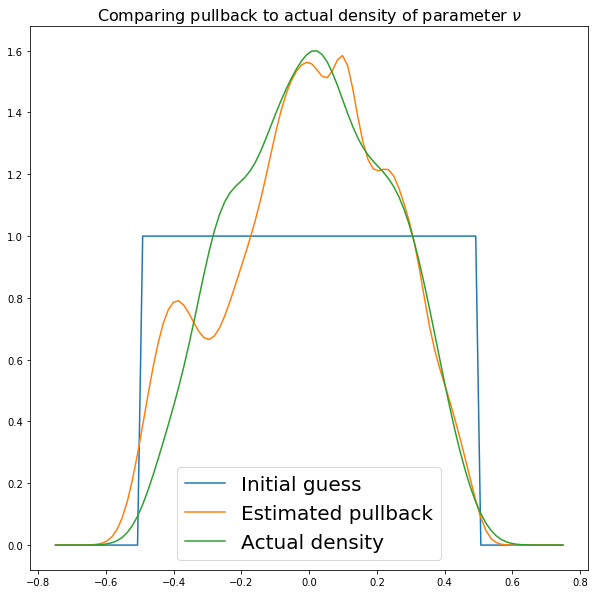

In [50]:
for i in range(params.shape[1]):
    fig = plt.figure(figsize=(10,10))
    fig.clear()
    x_min = min(min(params[:, i]), min(params_obs[:, i]))
    x_max = max(max(params[:, i]), max(params_obs[:, i]))
    delt = 0.25*(x_max - x_min)
    x = np.linspace(x_min-delt, x_max+delt, 100)
    plt.plot(x, unif_dist(x, param_range[i, :]),
         label = 'Initial guess')
    mar = np.zeros(x.shape)
    for j in range(learn.num_clusters):
        mar += param_marginals[i][j](x) * cluster_weights[j]
    plt.plot(x, mar, label = 'Estimated pullback')
    plt.plot(x, true_param_marginals[i](x), label = 'Actual density')
    plt.title('Comparing pullback to actual density of parameter ' + param_labels[i], fontsize=16)
    plt.legend(fontsize=20)

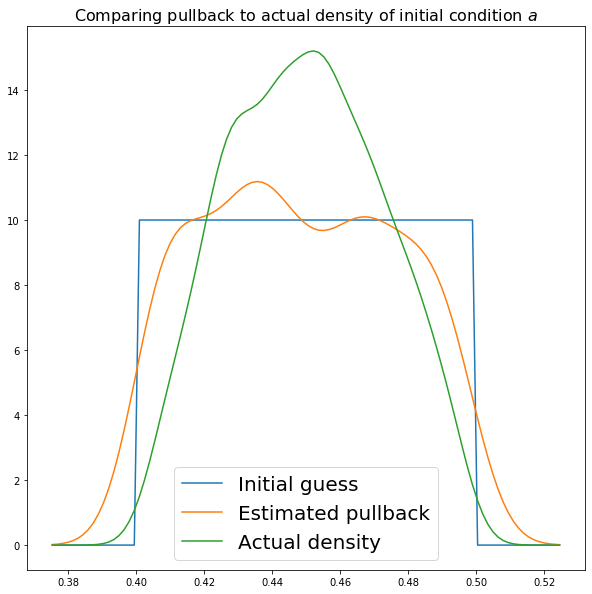

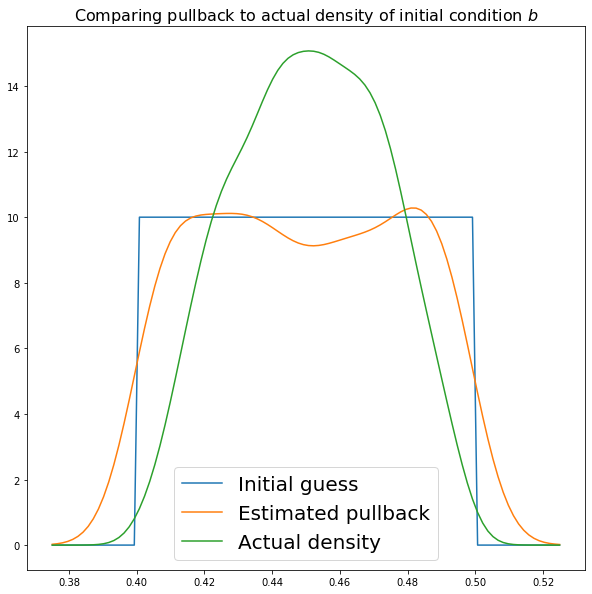

In [51]:
for i in range(ics.shape[1]):
    fig = plt.figure(figsize=(10,10))
    fig.clear()
    x_min = min(min(ics[:, i]), min(ics_obs[:, i]))
    x_max = max(max(ics[:, i]), max(ics_obs[:, i]))
    delt = 0.25*(x_max - x_min)
    x = np.linspace(x_min-delt, x_max+delt, 100)
    plt.plot(x, unif_dist(x, ic_range[i, :]),
         label = 'Initial guess')
    mar = np.zeros(x.shape)
    for j in range(learn.num_clusters):
        mar += ic_marginals[i][j](x) * cluster_weights[j]
    plt.plot(x, mar, label = 'Estimated pullback')
    plt.plot(x, true_ic_marginals[i](x), label = 'Actual density')
    plt.title('Comparing pullback to actual density of initial condition ' + ic_labels[i], fontsize=16)
    plt.legend(fontsize=20)